<a href="https://colab.research.google.com/github/Meet200/Machine_Learning-/blob/main/Logistic_regression_Fish_Market.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Dataset Used :- Fish market by Kaggle
# Basic understanding of dataset 
*   Length1:                  Vertical length in cm
*   Length2:                  Diagonal length in cm
*   Length3:                  Cross length in cm
*   Height:                   Height in cm
*   Width:                    Diagonal width in cm
*   Species:                  Species name of fish
*   Weight:                   Weight of fish in gram


In [85]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

In [86]:
from google.colab import drive

In [87]:
# mounting google drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [88]:
cd /content/drive/"My Drive/Colab Notebooks/Linear regression"

/content/drive/My Drive/Colab Notebooks/Linear regression


In [89]:
# Exporting data from Drive 
dataset = pd.read_csv("Fish.csv")
print(dataset)
dataset.shape

    Species  Weight  Length1  Length2  Length3   Height   Width
0     Bream   242.0     23.2     25.4     30.0  11.5200  4.0200
1     Bream   290.0     24.0     26.3     31.2  12.4800  4.3056
2     Bream   340.0     23.9     26.5     31.1  12.3778  4.6961
3     Bream   363.0     26.3     29.0     33.5  12.7300  4.4555
4     Bream   430.0     26.5     29.0     34.0  12.4440  5.1340
..      ...     ...      ...      ...      ...      ...     ...
154   Smelt    12.2     11.5     12.2     13.4   2.0904  1.3936
155   Smelt    13.4     11.7     12.4     13.5   2.4300  1.2690
156   Smelt    12.2     12.1     13.0     13.8   2.2770  1.2558
157   Smelt    19.7     13.2     14.3     15.2   2.8728  2.0672
158   Smelt    19.9     13.8     15.0     16.2   2.9322  1.8792

[159 rows x 7 columns]


(159, 7)

In [90]:
dataset.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


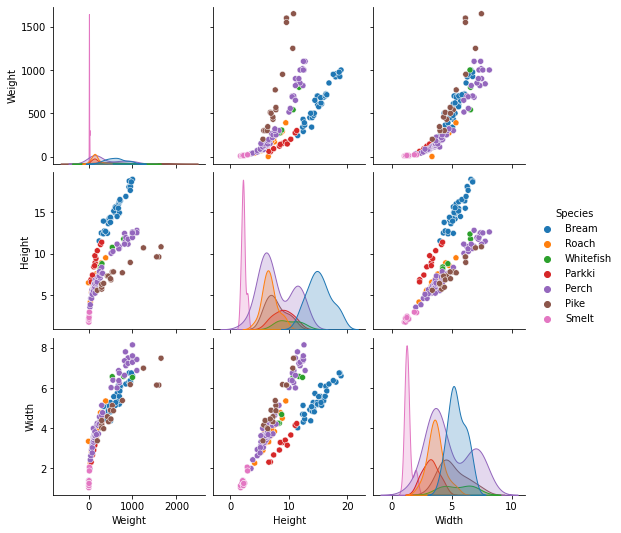

In [91]:
# ploting graph to visulize data
import seaborn as sns
sns.pairplot(dataset2, kind = 'scatter', hue = 'Species')

In [92]:
'''as we know that KNN use distance (usually Euclidean) in its mathematical steps so inorder to give equal important to each and every feature we have
to normalize/ standerdize our data set which uses euqation z=(feature-mean average)/standard deviation
'''
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler = scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [93]:
# spearating feature and target variable 
x=dataset.loc[:,'Weight':'Width']
y=dataset['Species']

In [94]:
x

,Weight,Length1,Length2,Length3,Height,Width
0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,290.0,24.0,26.3,31.2,12.4800,4.3056
2,340.0,23.9,26.5,31.1,12.3778,4.6961
3,363.0,26.3,29.0,33.5,12.7300,4.4555
4,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...
154,12.2,11.5,12.2,13.4,2.0904,1.3936
155,13.4,11.7,12.4,13.5,2.4300,1.2690
156,12.2,12.1,13.0,13.8,2.2770,1.2558
157,19.7,13.2,14.3,15.2,2.8728,2.0672


In [95]:
y

0      Bream
1      Bream
2      Bream
3      Bream
4      Bream
       ...  
154    Smelt
155    Smelt
156    Smelt
157    Smelt
158    Smelt
Name: Species, Length: 159, dtype: object

In [96]:
# spliting data in train and test dataset 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state=50) # here 33% dataset will be of testing and 67% will be for training

In [97]:
# training dataset
from sklearn.linear_model import LogisticRegression
Log_Reg =LogisticRegression(max_iter=5000).fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [98]:
print("Training  score: ",Log_Reg.score(X_train, y_train))
print("Test  score: }",Log_Reg.score(X_test, y_test))

Training  score:  0.9811320754716981
Test  score: } 0.9245283018867925


## From above score we can say that model is very good now will try to findout confusion matrix and classification report

In [99]:
from sklearn.metrics import classification_report,confusion_matrix
prediction=Log_Reg.predict(X_test)
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

       Bream       1.00      1.00      1.00        11
       Perch       0.95      0.95      0.95        20
        Pike       1.00      1.00      1.00         7
       Roach       1.00      0.67      0.80         6
       Smelt       0.80      1.00      0.89         8
   Whitefish       0.00      0.00      0.00         1

    accuracy                           0.92        53
   macro avg       0.79      0.77      0.77        53
weighted avg       0.93      0.92      0.92        53



In [100]:
print(confusion_matrix(y_test,prediction))

[[11  0  0  0  0  0]
 [ 0 19  0  0  1  0]
 [ 0  0  7  0  0  0]
 [ 0  0  0  4  1  1]
 [ 0  0  0  0  8  0]
 [ 0  1  0  0  0  0]]


 Here we can see the for value of iteration = 10000 we are gettting 89% accuracy  and for iteration = 5000 accuracy is = 92% which is Good and less complex compare to iteration = 10000